In [30]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import statsmodels.api as sm
import itertools
import warnings
import seaborn as sns
from fbprophet import Prophet


warnings.filterwarnings("ignore")
orders=pd.read_excel('Superstore.xls',sheet_name='Orders')
returns=pd.read_excel('Superstore.xls',sheet_name='Returns')
people=pd.read_excel('Superstore.xls',sheet_name='People')
Ords_Ret=pd.merge(orders,returns,how='outer').sort_values('Order Date')
Ords_Ret=Ords_Ret[["Category","Sales",'Order Date','Returned']]

# The Averagesales

In [2]:
Ords_Ret.groupby('Category').mean()

,Sales
Category,
Furniture,349.834887
Office Supplies,119.324101
Technology,452.709276


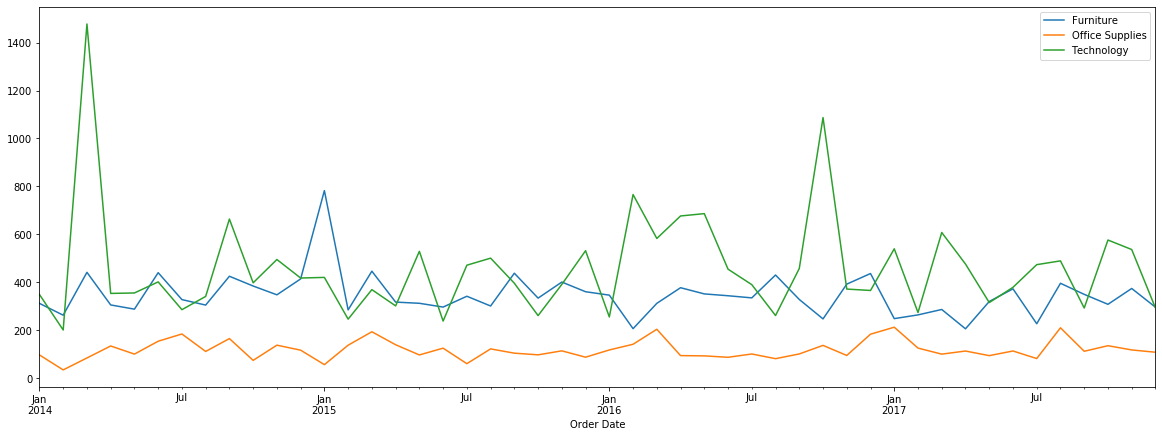

In [3]:
df=Ords_Ret.set_index('Order Date').groupby('Category').resample('M').mean().unstack(0)['Sales']
df.columns.name=''
df.plot(figsize=(20,7))
plt.show()

In [4]:
furniture= df.Furniture
office = df['Office Supplies']
technology = df.Technology

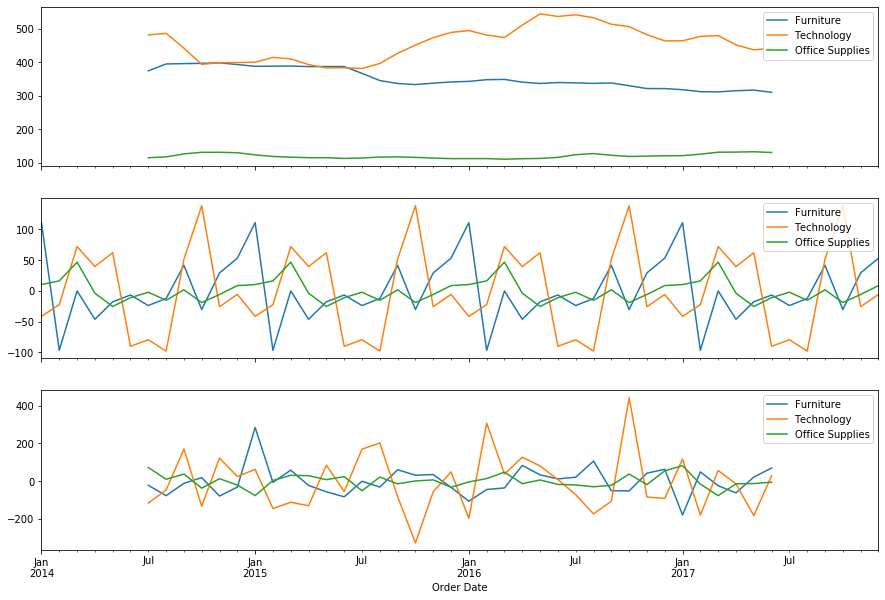

In [5]:
def Compute_decomposition(dfs):
    results=[]
    for i in range(len(dfs)):
        decomposition = sm.tsa.seasonal_decompose(dfs[i], model='additive')
        results.append(decomposition)
    return results

def Plot_decomposition(dfs):
    results=Compute_decomposition(dfs)
    fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,10),sharex=True)
    for i in range(len(results)):
        results[i].trend.plot(ax=ax1)
        results[i].seasonal.plot(ax=ax2)
        results[i].resid.plot(ax=ax3)
    #ax1.set_yscale("log")
    ax1.legend()
    ax2.legend()
    ax3.legend()
    #fig.suptitle('Additive Decomposition Model for {}'.format(title))
    plt.show()

Plot_decomposition([furniture,technology,office])

# Best selling articles

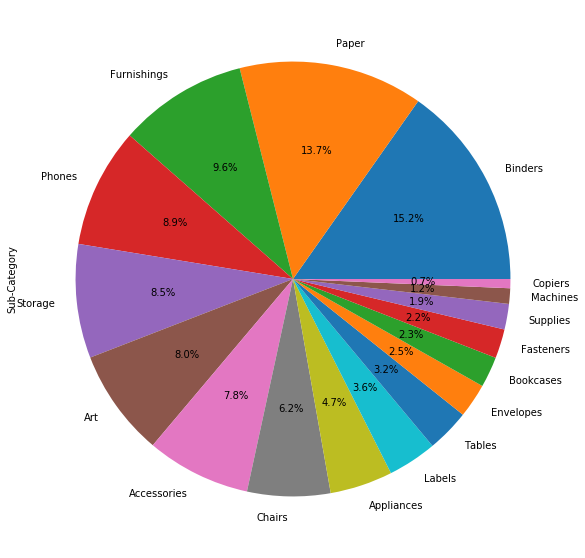

In [7]:
plt.figure(figsize=(12,10))
orders['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

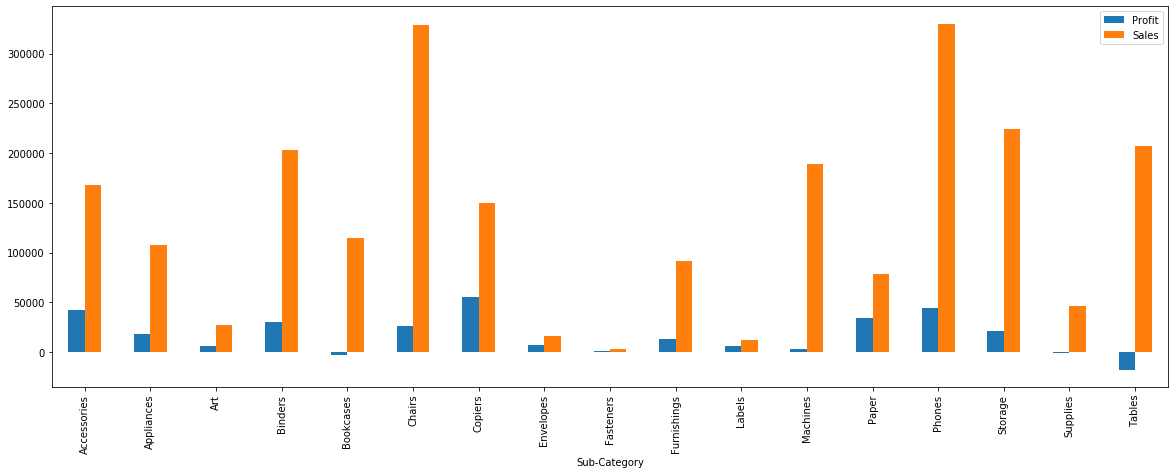

In [8]:
tmp=orders.groupby('Sub-Category')['Profit','Sales'].agg(['sum'])
tmp.columns=tmp.columns.droplevel(1)
tmp.plot.bar(figsize=(20,7))

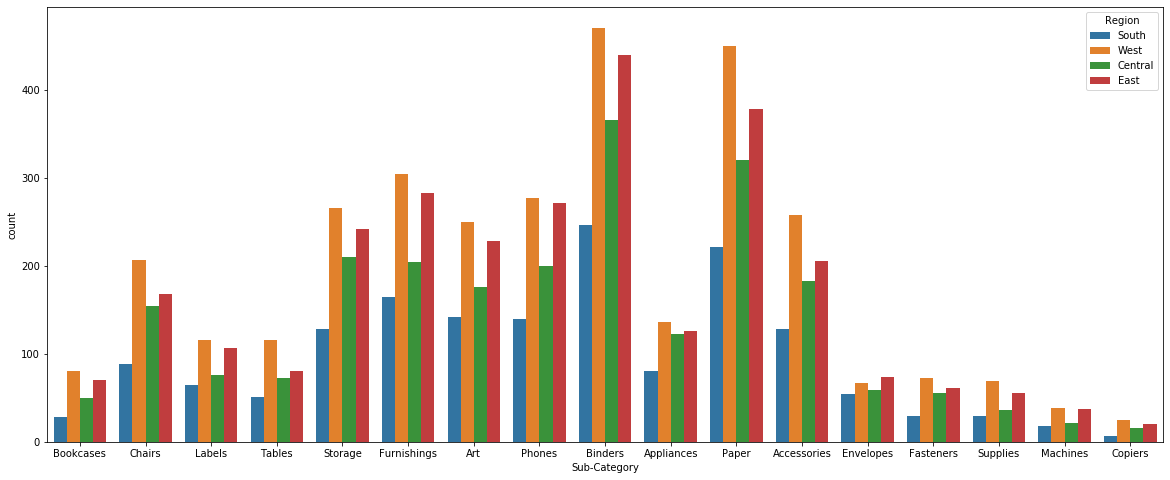

In [9]:
plt.figure(figsize=(20,8))
sns.countplot(x="Sub-Category", hue="Region", data=orders)
plt.show()

# Costs and profit percentage

In [11]:
orders['Cost']=orders['Sales']-orders['Profit']
orders['Profit %']=(orders['Profit']/orders['Cost'])*100

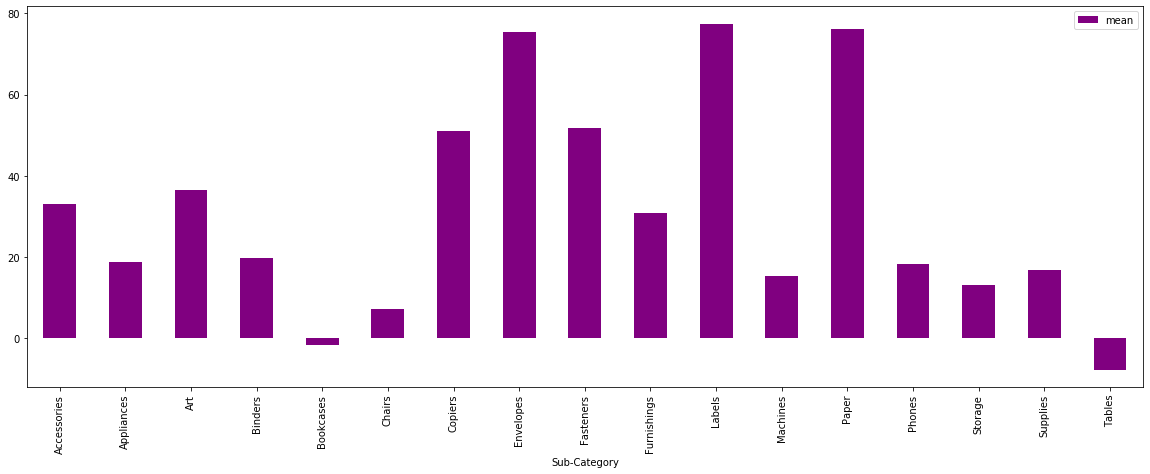

In [12]:
tmp=orders.groupby('Sub-Category')['Profit %'].agg(['mean'])
#tmp.columns=tmp.columns.droplevel(1)
tmp.plot.bar(figsize=(20,7),color="purple")
plt.show()

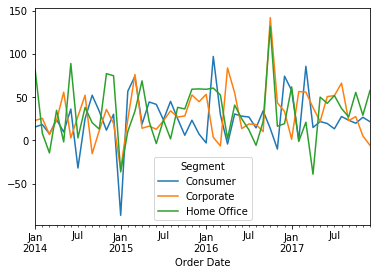

In [16]:
orders.set_index("Order Date").groupby("Segment").resample("M").mean()[["Profit","Cost"]].unstack(0)["Profit"].plot()

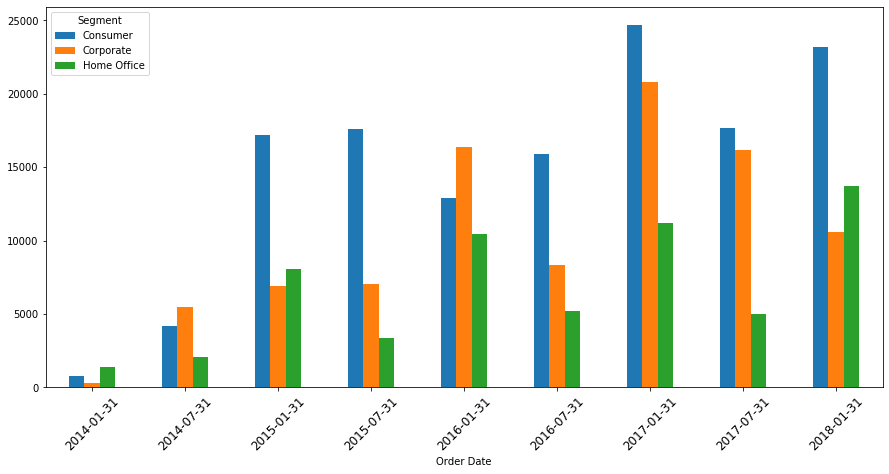

In [18]:
tmp=orders.set_index("Order Date").groupby("Segment").resample("6M").sum()[["Profit","Cost"]].unstack(0)["Profit"]
fig, ax = plt.subplots(figsize=(15,7))
tmp.plot.bar(ax=ax)
ax.set_xticklabels(tmp.index.date, fontsize=12)
ax.xaxis.set_tick_params(rotation=45)
plt.show()

# Best buyers

In [20]:
orders.set_index("Order Date").groupby(["Customer Name","Segment"]).sum().sort_values(by=["Profit","Sales"],ascending = False).head(600)["Sales"].sum()/orders["Sales"].sum() *100

81.29583907417275

In [21]:
names=orders.set_index("Order Date").groupby(["Customer Name","Segment"]).sum().sort_values(by=["Profit","Sales"],ascending = False).head(600).index.get_level_values(0).values
orders.loc[orders["Customer Name"].isin(names)].set_index("Order Date").groupby(["Segment"]).resample("Y").sum()["Profit %"]

Segment      Order Date
Consumer     2014-12-31    26301.239796
             2015-12-31    30998.905750
             2016-12-31    39847.612154
             2017-12-31    46451.285888
Corporate    2014-12-31    18200.021537
             2015-12-31    17242.546429
             2016-12-31    19504.815047
             2017-12-31    29021.174649
Home Office  2014-12-31    10665.590491
             2015-12-31    11153.924178
             2016-12-31    14763.603074
             2017-12-31    18626.946522
Name: Profit %, dtype: float64

# Profit and sellings per year

In [23]:
orders['Order Date']

0      2016-11-08
1      2016-11-08
2      2016-06-12
3      2015-10-11
4      2015-10-11
5      2014-06-09
6      2014-06-09
7      2014-06-09
8      2014-06-09
9      2014-06-09
10     2014-06-09
11     2014-06-09
12     2017-04-15
13     2016-12-05
14     2015-11-22
15     2015-11-22
16     2014-11-11
17     2014-05-13
18     2014-08-27
19     2014-08-27
20     2014-08-27
21     2016-12-09
22     2016-12-09
23     2017-07-16
24     2015-09-25
25     2016-01-16
26     2016-01-16
27     2015-09-17
28     2015-09-17
29     2015-09-17
          ...    
9964   2016-12-05
9965   2016-12-05
9966   2016-12-05
9967   2017-12-11
9968   2017-12-11
9969   2017-12-11
9970   2015-06-28
9971   2015-06-28
9972   2016-09-11
9973   2016-12-06
9974   2016-12-06
9975   2016-12-06
9976   2016-12-06
9977   2016-12-06
9978   2016-12-06
9979   2016-12-06
9980   2015-09-06
9981   2017-08-03
9982   2016-09-22
9983   2016-09-22
9984   2015-05-17
9985   2015-05-17
9986   2016-09-29
9987   2017-11-17
9988   201

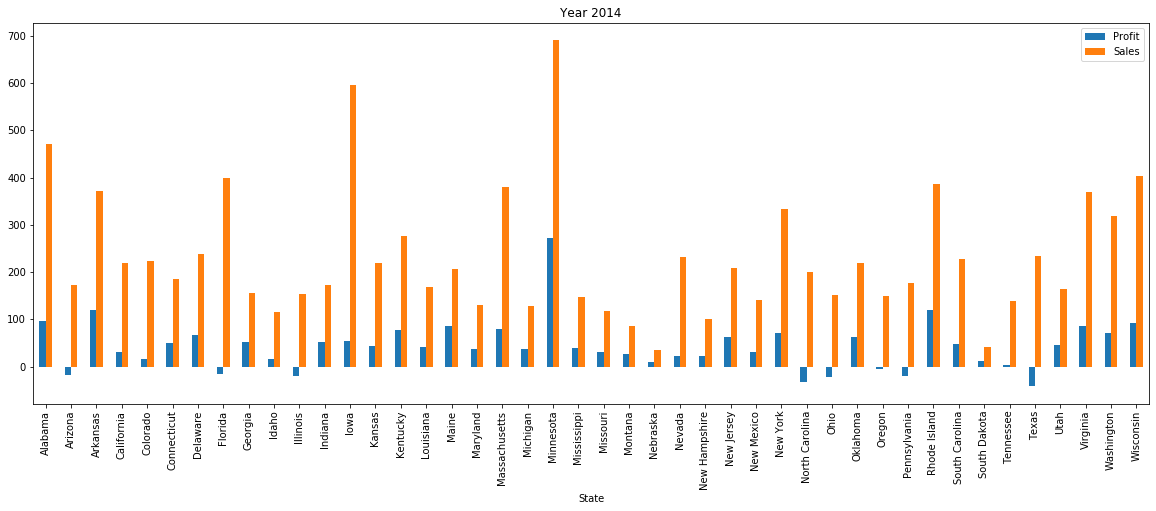

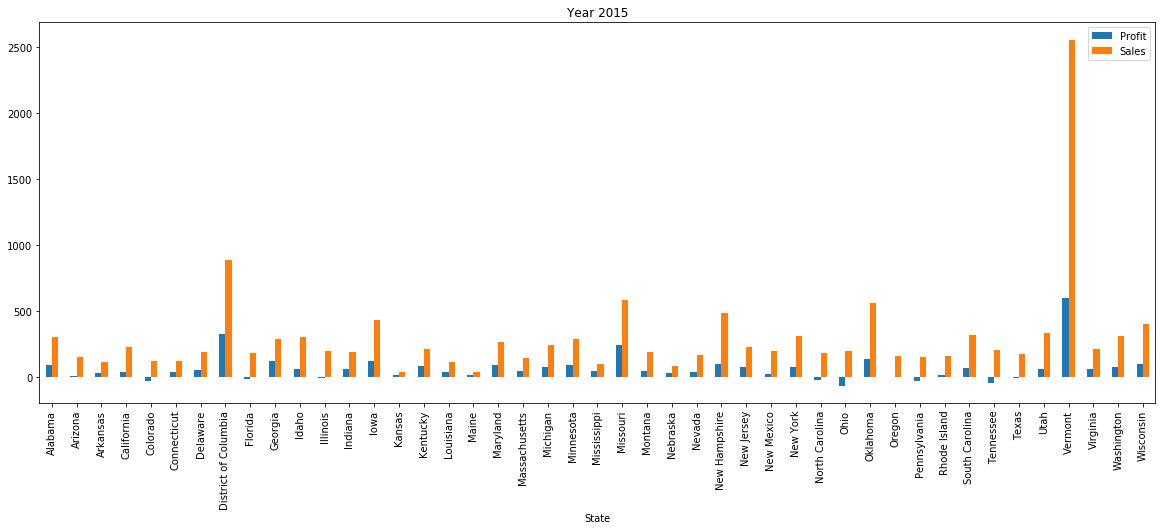

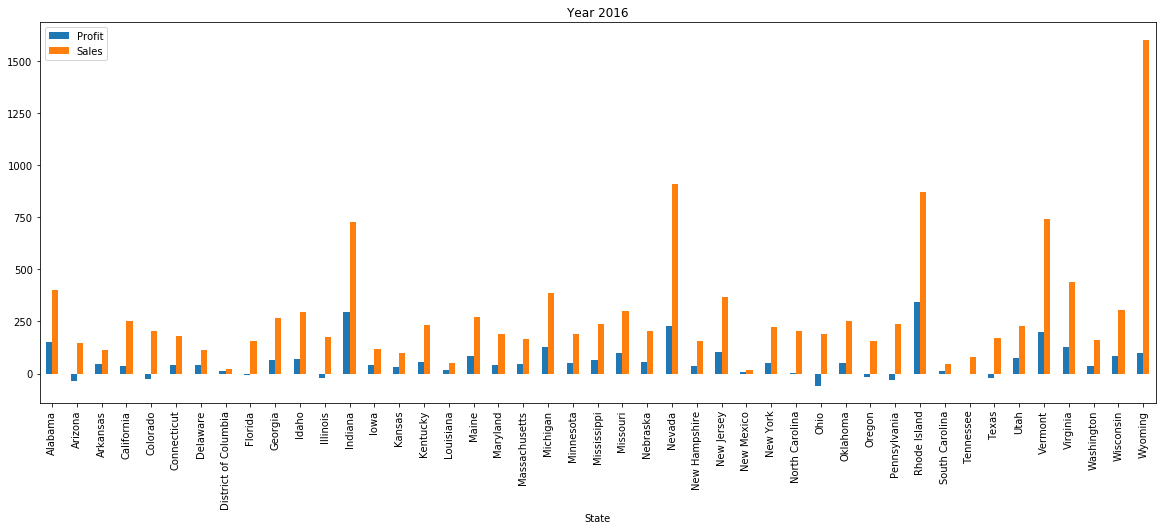

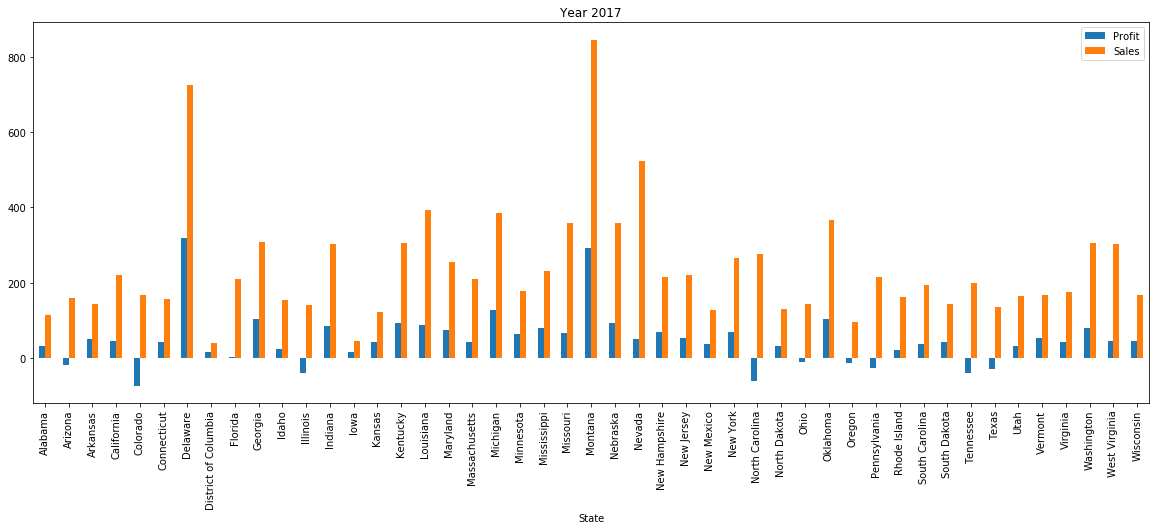

In [26]:
orders[orders["Order Date"].dt.year==2014].groupby("State").mean()[["Profit","Sales"]].plot.bar(figsize=(20,7),title="Year 2014")
plt.show()
orders[orders["Order Date"].dt.year==2015].groupby("State").mean()[["Profit","Sales"]].plot.bar(figsize=(20,7),title="Year 2015")
plt.show()
orders[orders["Order Date"].dt.year==2016].groupby("State").mean()[["Profit","Sales"]].plot.bar(figsize=(20,7),title="Year 2016")
plt.show()
orders[orders["Order Date"].dt.year==2017].groupby("State").mean()[["Profit","Sales"]].plot.bar(figsize=(20,7),title="Year 2017")
plt.show()

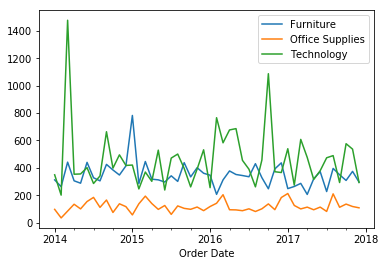

In [29]:
furniture=df.reset_index()[['Order Date', 'Furniture']]
technology = df.reset_index()[['Order Date', 'Technology']]
office = df.reset_index()[['Order Date', 'Office Supplies']]

In [122]:
def Get_prediction(data,date_column,item_column,mode='additive'):
    df=data.copy()
    df=df.rename(columns={date_column:'ds',item_column:'y'})
    forecast_model = Prophet(interval_width=0.95,seasonality_mode=mode)
    forecast_model.fit(df)
    df_forecast = forecast_model.make_future_dataframe(periods = 6,freq = 'M')
    df_forecast =forecast_model.predict(df_forecast)
    return forecast_model, df_forecast

    

In [128]:
def Plot_predictions(data,date_column,item_column,mode='additive'):
    a,b=Get_prediction(data,date_column,item_column,mode=mode)
    plt.figure(figsize=(20,7))
    plt.plot(b['ds'],b['yhat'],label='Prediction',color='rebeccapurple')
    plt.plot(data[date_column],data[item_column],label='Real',color='forestgreen')
    plt.fill_between(b['ds'],b['yhat_lower'],b['yhat_upper'],alpha=0.2,color='rebeccapurple')
    plt.xticks(rotation=45)
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title('{} Predictions'.format(item_column))
    plt.show()
    a.plot_components(b)
    plt.show()


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


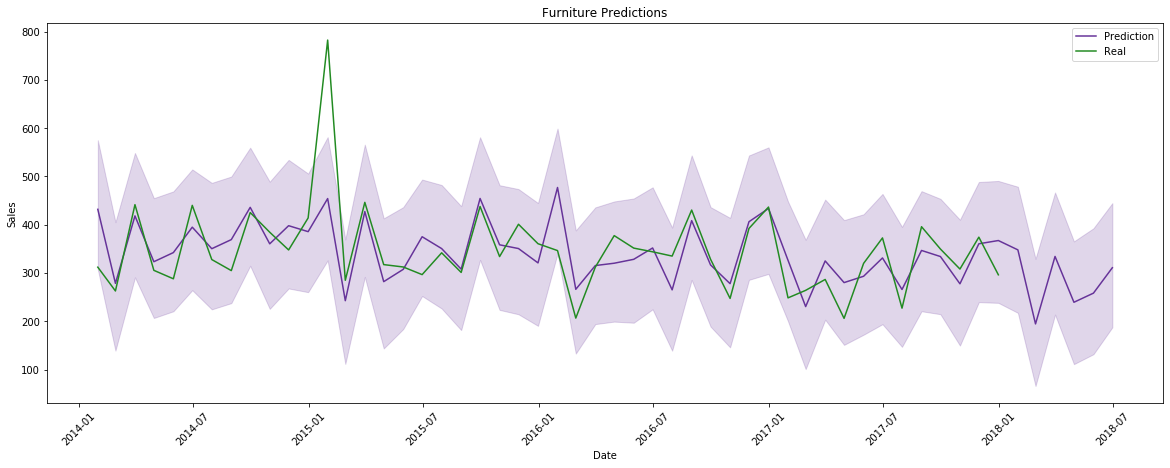

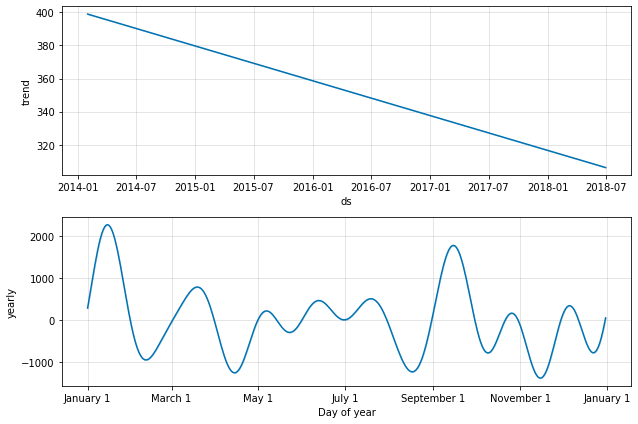

In [129]:
Plot_predictions(furniture,'Order Date', 'Furniture')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


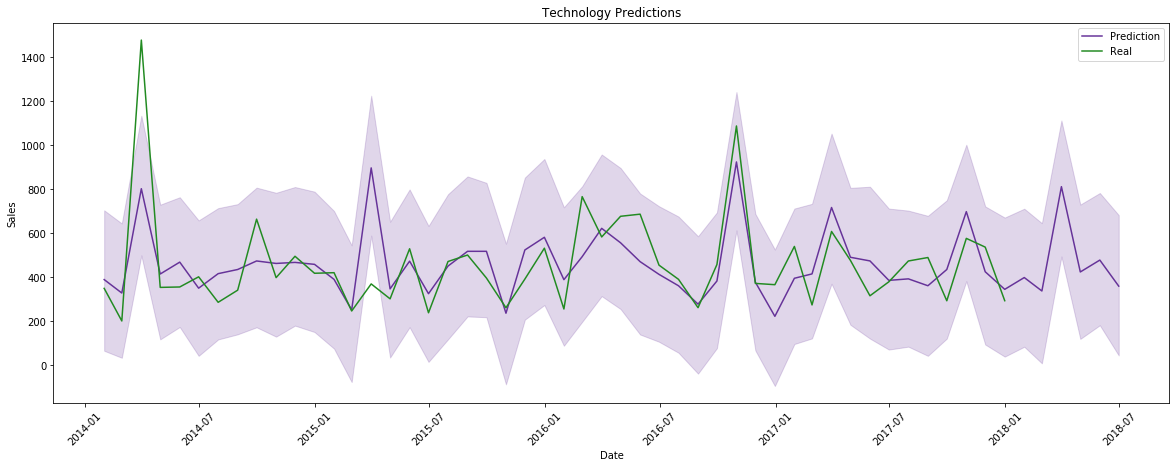

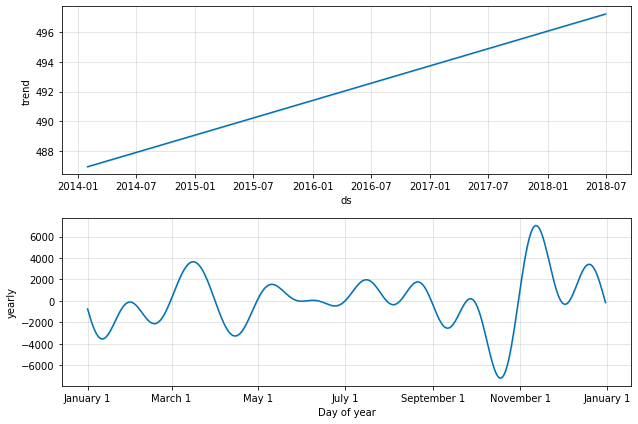

In [130]:
Plot_predictions(technology,'Order Date', 'Technology')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


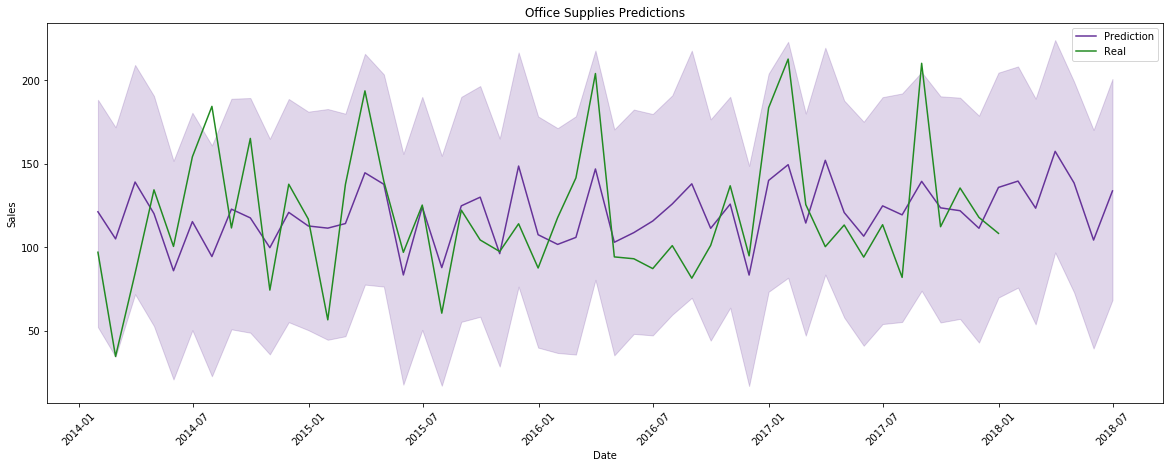

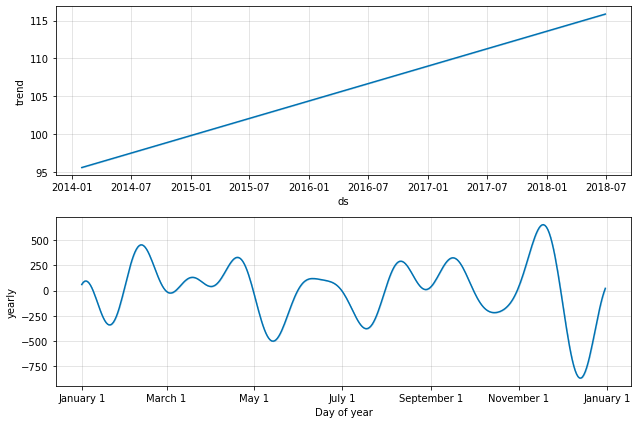

In [131]:
Plot_predictions(office,'Order Date', 'Office Supplies',mode='additive')

In [132]:
a=Get_prediction(furniture,'Order Date', 'Furniture')
b=Get_prediction(office,'Order Date', 'Office Supplies')
c=Get_prediction(technology,'Order Date', 'Technology')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [140]:
Sells=a[1][['yhat_lower','yhat_upper','yhat']]+b[1][['yhat_lower','yhat_upper','yhat']]+c[1][['yhat_lower','yhat_upper','yhat']]

In [142]:
Sells['date']=a[1]['ds']

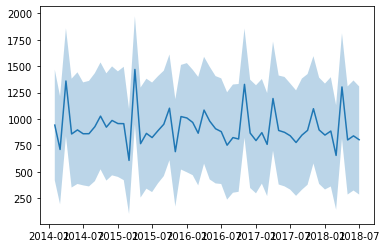

In [148]:
plt.plot(Sells['date'],Sells['yhat'])
plt.fill_between(Sells['date'],Sells['yhat_lower'],Sells['yhat_upper'],alpha=0.3)

In [150]:
Sells.set_index('date').tail(6)

,yhat_lower,yhat_upper,yhat
date,,,
2018-01-31,361.429621,1395.772711,886.003859
2018-02-28,141.659054,1130.802851,655.326111
2018-03-31,814.005177,1811.264761,1303.287833
2018-04-30,285.567314,1308.593214,801.724232
2018-05-31,323.410934,1364.620586,840.417816
2018-06-30,285.300400,1308.160471,804.077963


0     524.277613
1     511.116337
2     510.637593
3     514.938116
4     528.185812
5     487.175891
6     499.286680
7     511.059248
8     505.635000
9     507.559140
10    515.550930
11    499.265062
12    536.302629
13    496.626894
14    512.251775
15    520.579110
16    520.341460
17    518.248387
18    507.051510
19    498.783477
20    500.197941
21    507.744884
22    495.035404
23    516.335472
24    498.910235
25    512.906654
26    505.527737
27    533.098073
28    507.682754
29    499.773053
30    507.850360
31    512.112224
32    510.087381
33    517.213866
34    512.538205
35    511.319113
36    495.226169
37    487.510382
38    516.817351
39    515.485127
40    517.694731
41    502.296390
42    499.074096
43    526.239536
44    523.636496
45    507.705874
46    502.958771
47    501.054499
48    517.171545
49    494.571898
50    498.629792
51    511.512950
52    520.604826
53    511.430036
dtype: float64

In [161]:
Sells['Prediction']=np.round(Sells['yhat'],2).astype(str)+ r'$\pm$' + np.round(((-Sells['yhat']+Sells['yhat_upper'])+(Sells['yhat']-Sells['yhat_lower']))/2,2).astype(str)

In [165]:
Sells[['date','Prediction']].tail()

,date,Prediction
49,2018-02-28,655.33$\pm$494.57
50,2018-03-31,1303.29$\pm$498.63
51,2018-04-30,801.72$\pm$511.51
52,2018-05-31,840.42$\pm$520.6
53,2018-06-30,804.08$\pm$511.43
